# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ferris Tita Sabilillah
- **Email:** ferristita1606@gmail.com
- **ID Dicoding:** ferris_tita_Qa3I

## Menentukan Pertanyaan Bisnis

1.   Metode pembayaran manakah yang paling umum digunakan pelanggan Olist Departement Store ?
2.   Darimanakah kota asal dengan populasi terbesar pelanggan Olist Departement Store ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import library

## Data Wrangling

### Gathering Data

memuat table payments_df

In [2]:
payments_df = pd.read_csv("olist_order_payments_dataset.csv", delimiter=",")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


memuat table customers_df

In [3]:
customers_df = pd.read_csv("olist_customers_dataset.csv", delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


memuat table orders_df

In [4]:
orders_df = pd.read_csv("olist_orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

cek tipe data, terdapat perbedaan jumlah data, cek missing value pada table customers_df

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

tidak terdapat missing value

In [7]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi

cek tipe data, terdapat perbedaan jumlah data, cek missing value pada table payments_df

In [8]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

tidak terdapat missing value

In [10]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

tidak terdapat missing value, tetapi tipe data pada order_delivered_carrier_date, order_delivered_customer_date, order_delivered_delivery_date yang seharusnya adalah datetime bukan object.

tidak terdapat missing value

In [13]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi

### Cleaning Data

drop duplikasi pada table order

In [14]:
orders_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

melihat rangkuman parameter statistik table customers

In [15]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


melihat rangkuman parameter statistik table payments

In [16]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


melihat rangkuman parameter statistik table orders

In [17]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


melakukan merge payments_df dan orders_df selanjutnya creat file main_data_payment_order.csv untuk diolah data nantinya

In [18]:
payments_order_df = pd.merge(
    left=payments_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_order_df.head()
payments_order_df.to_csv("main_data_payment_order.csv", index=False)

melakukan merge customer_df dan orders_df selanjutnya creat file main_data_customer_order.csv untuk diolah data nantinya

In [19]:
customer_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.head()
customer_order_df.to_csv("main_data_customer_order.csv", index=False)

akan menghasilkan pivot table menampilkan tipe pembayaran dengan jumlah order terbesar

In [20]:
# Mengelompokkan data dan menghitung jumlah order unik untuk setiap jenis pembayaran
payment_counts = payments_order_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

# Mengganti nama kolom
payment_counts = payment_counts.rename(columns={"payment_type": "Metode Pembayaran", "order_id": "Jumlah Pembayaran"})

akan menghasilkan pivot table menampilkan kota dengan jumlah order terbesar

In [21]:
# Mengelompokkan data dan menghitung jumlah order unik untuk setiap jenis pembayaran
cities_counts = customer_order_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

# Mengganti nama kolom
cities_counts = cities_counts.rename(columns={"customer_city": "Asal Kota", "order_id": "Jumlah Pelanggan"})

## Visualization & Explanatory Analysis

### Pertanyaan 1:

membuat visualisasi menggunakan barchart

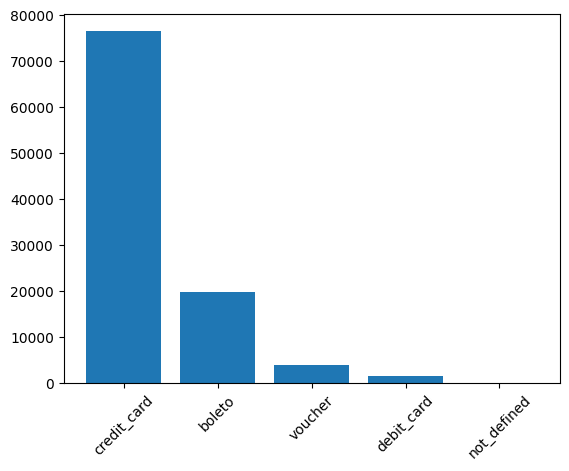

In [22]:
plt.bar(x=payment_counts['Metode Pembayaran'], height=payment_counts['Jumlah Pembayaran'])
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

membuat visualisasi menggunakan barchart

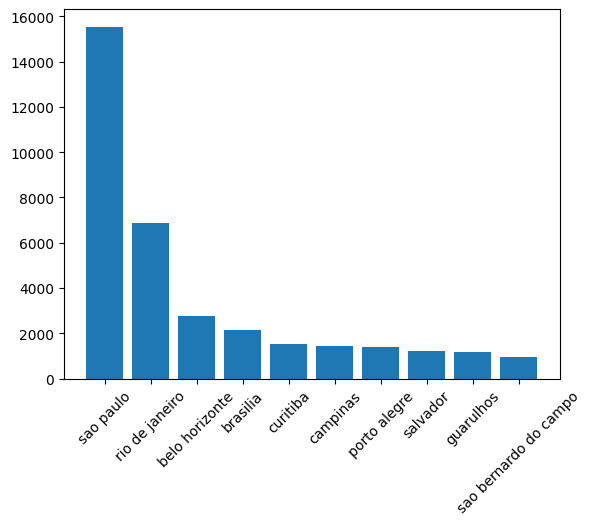

In [23]:
plt.bar(x=cities_counts['Asal Kota'], height=cities_counts['Jumlah Pelanggan'])
plt.xticks(rotation=45)
plt.show()

mengubah posisi supaya mudah terbaca

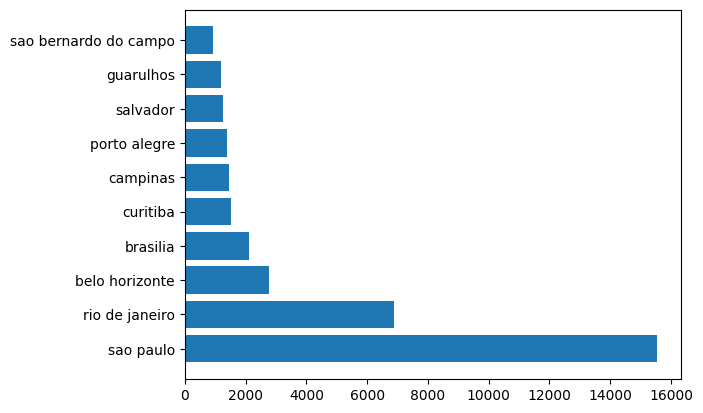

In [24]:
plt.barh(y=cities_counts['Asal Kota'], width=cities_counts['Jumlah Pelanggan'])
plt.show()

## Conclusion

- Jenis Pembayaran yang Paling Banyak Digunakan: Data menunjukkan bahwa metode pembayaran yang paling banyak digunakan adalah kartu kredit (credit card) dengan total transaksi sebanyak 76.505 kali.
- Kota dengan Populasi Customer Terbesar: Berdasarkan data, kota Sao Paulo memiliki populasi pelanggan terbesar dengan total 15.540 pelanggan.

Dengan demikian, dari hasil analisis ini, kita dapat menarik kesimpulan bahwa Sao Paulo memiliki jumlah pelanggan yang signifikan dan mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran utama. Informasi ini dapat memberikan wawasan yang berharga bagi pengambil keputusan dalam merencanakan strategi pemasaran dan layanan pelanggan di wilayah Sao Paulo dan Metode Pembayaran Kartu Kredit.